# Implement K Means Clustering Algorithm

### Submitted by: Nidhi Goyal

## I. Module imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## II. K Means Algorithm

### What is K Means Clustering?

K Means Clustering is an unsupervised machine learning algorithm. It will also work on unlabelled data.

Methodology for the K Means algorithm:

1. Choose the value of k(number of clusters) in the dataset
2. To start as your centroids, randomly select clusters featuresets
3. Calculate distance of all other featuresets to centroids
4. Find clusters by min distance from centroid
5. Classify all the featuresets as same as closest centroid
6. Take mean of each cluter (mean of all featuresets by cluster), making that mean the new centroid
7. Repeat steps 3-6 until optimized (value of new centroid and previous centroid will be same)

8. Predict function is to predict the test data that featureset belongs to which cluster

In [2]:
# KMeans Algorithm

class KMeansClustering:
    def __init__(self, dataset, num_clusters, random_state=42):
        self.dataset = dataset
        self.k = num_clusters
        self.cluster_groups = {}
        self.labels = np.zeros((dataset.shape[0], 1))
        np.random.seed(random_state)
        
    #  Create random centroids.
    def create_centroids(self):
        size = np.shape(self.dataset)[0]
        
        idx = np.random.randint(0, size - 1)
        centroid = np.array([self.dataset[idx]])

        for _ in range(1, self.k):
            idx = np.random.randint(0, size - 1)
            centroid = np.append(centroid, [self.dataset[idx]], axis=0)

        self.centroids = centroid
    
    # Calculate the euclidean distance
    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum(np.square(a - b)))
    
    # Using euclidean distance, find the cluster for featuresets
    def find_cluster(self, feature_set):
        distances = [self.euclidean_distance(feature_set, centroid) for centroid in self.centroids]
        target_cluster = np.argmin(distances)
        return target_cluster
    
    # Classify the clusters
    def classify(self):
        for i in range(self.k):
            self.cluster_groups[i] = []

        idx = 0
        for feature_set in self.dataset:
            target_cluster_id = self.find_cluster(feature_set)
            self.cluster_groups[target_cluster_id].append(feature_set)
            self.labels[idx] = target_cluster_id
            idx = idx + 1

        for i in range(self.k):
            self.cluster_groups[i] = np.array(self.cluster_groups[i])
    
    # Recompute the centroid by taking mean   
    def recompute_centroids(self):
        for cluster_id in self.cluster_groups:
            self.centroids[cluster_id] = np.mean(self.cluster_groups[cluster_id], axis=0)
        
    # Check the centroid is optimized or not
    def is_centroid_optimized(self, prev_centroids):        
        for i in range(self.k):
            curr = self.centroids[i]
            prev = prev_centroids[i]

            if self.euclidean_distance(curr, prev) != 0:
                return False

        return True
    
    def fit(self, max_iterations=300):
        # 1. Create random centroids
        self.create_centroids()

        for iter in range(max_iterations):
            # 2. Classify featureset into clusters
            self.classify()

            # 3. Calculate new centroids
            prev_centroids = np.copy(self.centroids)
            self.recompute_centroids()

            # 4. Check if centroids are optimized
            if self.is_centroid_optimized(prev_centroids):
                break

        return self.cluster_groups, self.centroids, self.labels
    
    # To predict any featureset who belongs to which cluster
    def predict(self, test_data):
        cluster = np.empty(test_data.shape[0])
        for feature_set in test_data:
            cluster.append(self.find_cluster(feature_set))
        return cluster
    
    def inertia(self):
        inertia = 0
        for i in range(self.k):
            centroid = self.centroids[i]
            cluster = self.cluster_groups[i]
            for feature in cluster:
                inertia += self.euclidean_distance(feature, centroid)
        
        return inertia

# III. Data input

In [3]:
# Read the dataset csv file and store the data into dataframe

dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.shape)
dataset.head(5)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# IV. Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Let's check if is there any null values in the dataset

dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Let's check if is there any duplicated values in the dataset

dataset.duplicated().sum()

0

In [7]:
# select columns you need

data = dataset[['Annual Income (k$)','Spending Score (1-100)']]
print(data.shape)
data.head(5)

(200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# V. Data Pre-processing

### The K-means clustering algorithm has a few key assumptions about the data: 
#### (1) data is not skewed
#### (2) features have the same mean
#### (3) features have the same variance

In [8]:
# To generate descriptive statistics.

data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


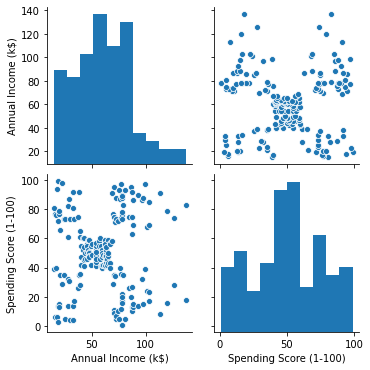

In [9]:
sns.pairplot(data)

This data in not extreme. Since, here mean and standard deviation of both the column have a little diffferent value, so we can try normalizing our data.

In [10]:
# x_new = (x - x_min) / (x_max - x_min)
def normalize(x):
    x_new = np.zeros((x.shape[0], x.shape[1]))
    for col in range(x.shape[1]):
        min_val = np.min(x, 0)[col]
        max_val = np.max(x, 0)[col]

        for row in range(x.shape[0]):
            x_new[row,col] = (x[row,col] - min_val) / (max_val - min_val)

    return x_new

In [11]:
data_np = data.to_numpy()
normalized_data_np = normalize(data_np)
normalized_data_df = pd.DataFrame(normalized_data_np, columns=data.columns)

In [12]:
# Describe the normalized dataframe

normalized_data_df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,0.373443,0.502041
std,0.215285,0.263505
min,0.000000,0.000000
25%,0.217213,0.344388
50%,0.381148,0.500000
75%,0.516393,0.734694
max,1.000000,1.000000


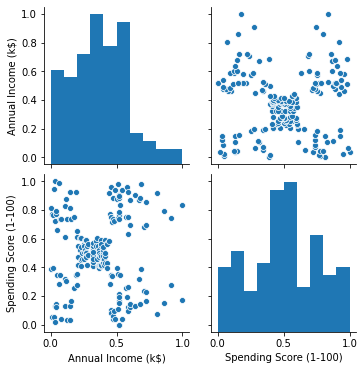

In [13]:
sns.pairplot(normalized_data_df)

# VI. Apply KMeans Clustering

## 1. Elbow Method

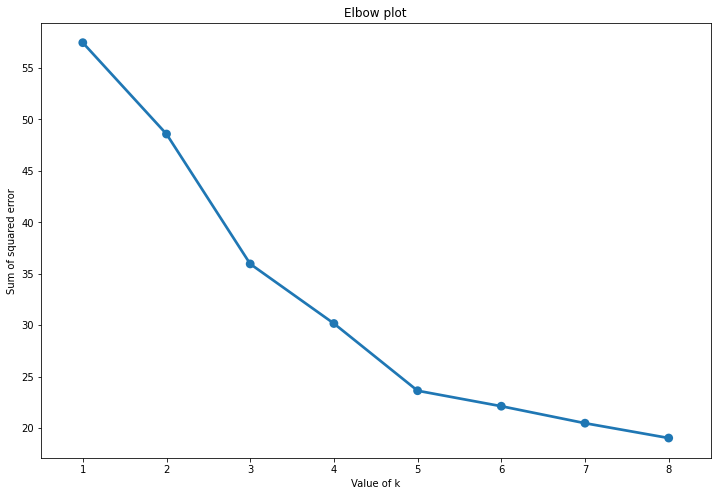

In [14]:
ss_error = {}

for num in range(1,9):
    kMeans = KMeansClustering(normalized_data_np, num_clusters=num)
    target_cluster, centroids, labels = kMeans.fit()
    ss_error[num] = kMeans.inertia()

# Elbow Method
plt.figure(figsize = (12,8))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

In [15]:
print(data.shape)
K = 5
kMeans = KMeansClustering(normalized_data_np, num_clusters=K)
target_cluster, centroids, labels = kMeans.fit()

for k in range(K):
    print("Cluster: {0}, Size: {1}".format(k, target_cluster[k].shape[0]))

(200, 2)
Cluster: 0, Size: 22
Cluster: 1, Size: 39
Cluster: 2, Size: 82
Cluster: 3, Size: 22
Cluster: 4, Size: 35


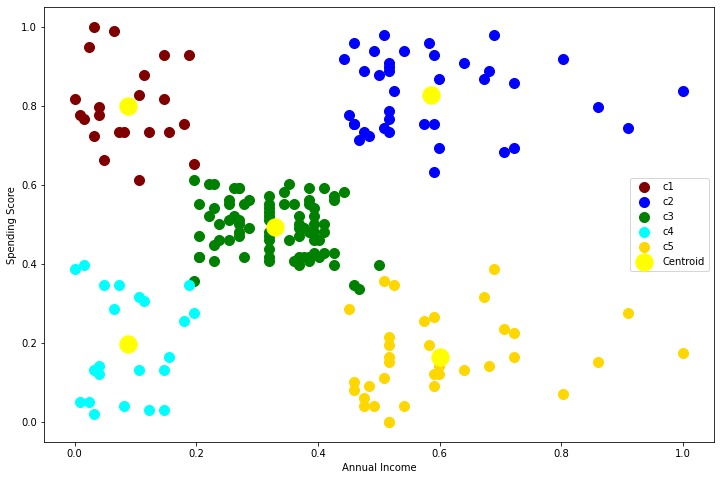

In [16]:
# Visualising the clusters using plt

colors =['maroon','blue','green','cyan','gold']
labels=['c1','c2','c3','c4','c5']
plt.figure(figsize = (12,8))

for k in range(K):
    plt.scatter(target_cluster[k][:,0], target_cluster[k][:,1], s = 100, c = colors[k], label = labels[k])

plt.scatter(centroids[:,0], centroids[:,1], c = 'yellow', s = 300, label = 'Centroid')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

## 2. Silhoutte method

In [17]:
from functools import reduce
from collections import defaultdict

def calculate_silhoutte_score(num_cluster, dataset_np):
    dataset = pd.DataFrame(dataset_np, columns = ["Annual Income (k$)", "Spending Score (1-100)", "Cluster"])
    num_elements_cluster = dataset.groupby('Cluster').size()
    score = []

    '''
        1. Start an outer loop, iterating over each featureset
        2. Compare against rest of the feature set and calculate inter and intra distance
        3. Find minimum inter cluster distance (A) and mean intra cluster distance (B)
        4. Calculate silhoutte score as (A - B) / max(A, B)
        5. Repeat the process for remaining featuresets and calculate average score
    '''

    i = 0
    # Step 1, pick a feature set
    for x in dataset_np:
        x_cluster = dataset_np[i, 2]
        inter_dist = defaultdict(lambda:0, {})
        intra_dist = 0
        inter_dist_list = []

        # Step 2, compare against remaining feature sets
        j = 0
        for y in dataset_np:
            if j == i:
                j = j + 1
                continue

            y_cluster = dataset_np[j, 2]
            distance = np.sqrt(np.sum(np.square(x[:-1] - y[:-1])))

            if x_cluster == y_cluster: # Cluster same, add to intra-cluster distance
                intra_dist += distance

            else: # Cluster different, add to inter-cluster distance
                inter_dist[y_cluster] += distance

            j = j + 1

        # Step 3
        # a. Calculate mean inter cluster distance
        for cluster_id, cluster_dist in inter_dist.items():
            mean_dist = cluster_dist / num_elements_cluster[cluster_id]
            inter_dist_list.append(mean_dist)

        # b. Calculate mean intra cluster distance
        mean_intra_dist = intra_dist / num_elements_cluster[x_cluster]

        # c. Find the minimum inter cluster distance
        min_inter_dist = min(inter_dist_list)

        # Step 4, calculate silhoutte score
        curr_score = (min_inter_dist - mean_intra_dist) / max(mean_intra_dist, min_inter_dist)
        score.append(curr_score)

        # Step 5, repeat the process
        i = i + 1

    average_silhouette = reduce(lambda x, y: x + y, score) / len(score)
    print("Average silhoutte score for K={} is {}".format(num_cluster, average_silhouette))

    return average_silhouette

In [18]:
'''Silhoutte Method'''

scores = []
clusters = [i for i in range(2,9)]

for k in clusters:
    kMeans = KMeansClustering(normalized_data_np, num_clusters=k)
    target_cluster, centroids, cluster_labels = kMeans.fit()
    data = np.append(normalized_data_np, cluster_labels, axis=1)
    score = calculate_silhoutte_score(k, data)
    scores.append(score)

Average silhoutte score for K=2 is 0.340079545634565
Average silhoutte score for K=3 is 0.45797761756588506
Average silhoutte score for K=4 is 0.5058273615792311
Average silhoutte score for K=5 is 0.571541454835046
Average silhoutte score for K=6 is 0.5334193876255522
Average silhoutte score for K=7 is 0.4404005105986028
Average silhoutte score for K=8 is 0.4555998443759128


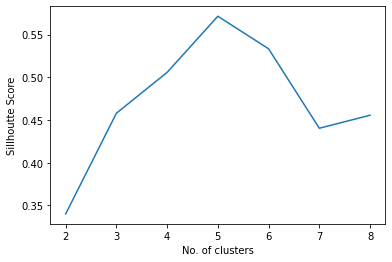

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('No. of clusters')
ax.set_ylabel('Sillhoutte Score')
ax.plot(clusters, scores)

# VII. Compare with Sklearn KMeans Clustering

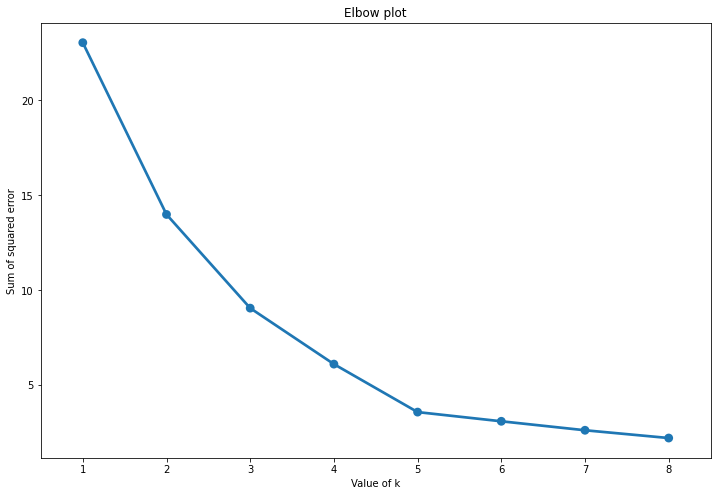

In [20]:
from sklearn.cluster import KMeans

# Fit KMeans and calculate SSE for each *k*
ss_error = {}

for num in range(1,9):
    kmeans = KMeans(n_clusters = num, random_state = 42)
    kmeans.fit(normalized_data_df)
    ss_error[num] = kmeans.inertia_
    
plt.figure(figsize = (12,8))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

In [21]:
kmeans = KMeans(n_clusters = K, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data_df)

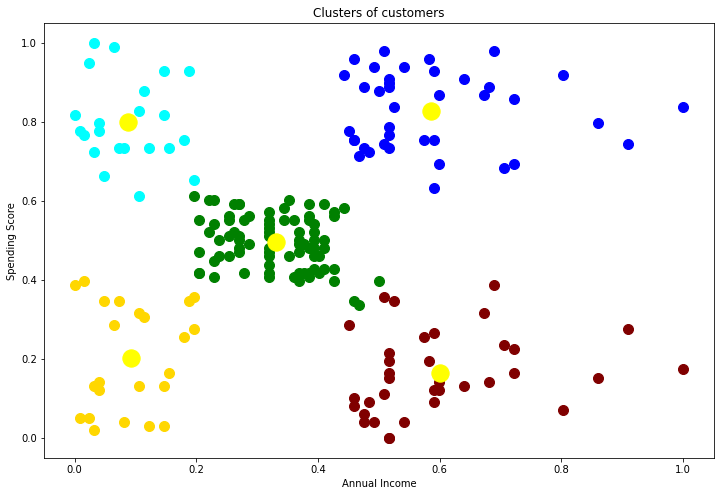

In [22]:
# Visualising the clusters using plt

plt.figure(figsize = (12,8))
for k in range(K):
    plt.scatter(normalized_data_np[y_kmeans == k, 0], normalized_data_np[y_kmeans == k, 1], s = 100, c = colors[k], label = labels[k])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# VII. Inference:

After comparing to the Sklearn K Means algorithm's Elbow plot, 5 clusters can better differentiate. The five groups are:
1. Low income with High spending score(Cluster 1)
2. High income with high spending score(Cluster 2)
3. Medium income with medium spending score(Cluster 3)
4. Low income with low spending score(Cluster 4)
5. High income with Low spending score(Cluster 5)

# VIII. Citations:

1. https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
2. https://www.wallstreetmojo.com/normalization-formula/
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
4. https://mathworld.wolfram.com/Distance.html
5. https://medium.com/@jyotiyadav99111/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308#:~:text=Silhouette%20Coefficient%20%3D%20(x%2Dy)%2F%20max,varies%20between%20%2D1%20and%201
6. https://en.wikipedia.org/wiki/Silhouette_(clustering)
7. https://github.com/vipulmeh23/Silhouette-Calculation-Without-Library-Function/blob/master/sci.py